Slightly improving recall is way better than massively improving precision.

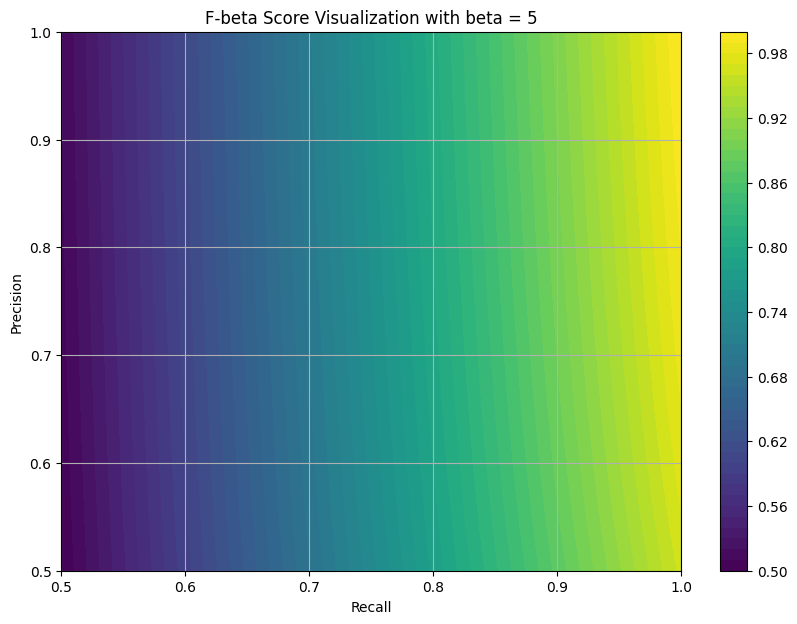

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define beta
beta = 5

# Generate a range of precision and recall values
precision = np.linspace(0.5, 1, 100)
recall = np.linspace(0.5, 1, 100)

# Create a meshgrid of precision and recall values
P, R = np.meshgrid(precision, recall)

# Calculate F-beta score for each combination of precision and recall
F_beta = (1 + beta**2) * (P * R) / ((beta**2 * P) + R)

# Plotting
plt.figure(figsize=(10, 7))
contour = plt.contourf(R, P, F_beta, 50, cmap='viridis')
plt.colorbar(contour)
plt.title(f'F-beta Score Visualization with beta = {beta}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

In [2]:
def f_beta(precision, recall, beta=5):
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)


print(f_beta(0.5, 0.85))
print(f_beta(0.45, 0.875))
print(f_beta(0.4, 0.9))
print(f_beta(0.3, 0.95))

0.8277153558052434
0.8443298969072164
0.8587155963302753
0.8769230769230769


In [3]:
print(f_beta(0.8, 0.85))
print(f_beta(0.7, 0.875))
print(f_beta(0.7, 0.9))
print(f_beta(0.7, 0.95))

0.8479616306954436
0.8666666666666666
0.8902173913043478
0.9371273712737127


In [4]:
print(f_beta(0.6, 0.99))
print(f_beta(0.7, 0.97))
print(f_beta(0.8, 0.96))
print(f_beta(0.85, 0.95))
print(f_beta(0.9, 0.95))

0.9658536585365853
0.9558202490525176
0.9526717557251908
0.9457207207207208
0.9479744136460555


There are 55 youtube links in the provided dataset. 33 are labeled as non-PII. 20 are PII

In [5]:
# predict all as positive
num_negative = 33
num_positive = 20

tp = num_positive
fp = num_negative
fn = 0

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Recall: ", recall)
print("Precision: ", precision)

print(f_beta(precision, recall))

Recall:  1.0
Precision:  0.37735849056603776
0.9403254972875227


In [6]:
# predict all positive, half negative

tp = num_positive
fp = num_negative // 2

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Recall: ", recall)
print("Precision: ", precision)

print(f_beta(precision, recall))

Recall:  1.0
Precision:  0.5555555555555556
0.9701492537313433


In [7]:
# predict 80% positive, 25% negative

tp = int(num_positive * 0.8)
fp = num_negative // 4
fn = num_positive - tp

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Recall: ", recall)
print("Precision: ", precision)

print(f_beta(precision, recall))

Recall:  0.8
Precision:  0.6666666666666666
0.7938931297709925


In [8]:
# miss 10% positive

tp = int(num_positive * 0.9)
fp = num_negative // 4
fn = num_positive - tp

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Recall: ", recall)
print("Precision: ", precision)

print(f_beta(precision, recall))

Recall:  0.9
Precision:  0.6923076923076923
0.8897338403041826


In [9]:
# miss 5% positive

tp = int(num_positive * 0.95)
fp = num_negative // 4
fn = num_positive - tp

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Recall: ", recall)
print("Precision: ", precision)

print(f_beta(precision, recall))

Recall:  0.95
Precision:  0.7037037037037037
0.937381404174573


In [4]:
import json

data = json.load(open("/drive2/kaggle/pii-dd/data/train.json"))

num_labels = 0

for d in data:
    num_labels += len([x for x in d["labels"] if x != "O"])

num_labels, len(data)

(2739, 6807)

In [5]:
num_labels/len(data) * 15193 * 0.25

1528.3394667254297

In [6]:
total_essays =  22000
train_essays = 6807
test_essays = total_essays - train_essays

labels_per_train_essay = num_labels / train_essays
num_test_labels = labels_per_train_essay * test_essays
num_pub_test_labels = int(num_test_labels * 0.25)

test_essays, num_test_labels, num_pub_test_labels

(15193, 6113.357866901719, 1528)

In [7]:
public_percentage = 0.25

tp = int(num_test_labels * public_percentage * 0.97)
fp = 200
fn = num_pub_test_labels - tp

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(tp, fp, fn)
f_beta(precision, recall), precision, recall

1482 200 46


(0.9661501429216188, 0.8810939357907254, 0.9698952879581152)

10 tp become fn

In [8]:
diff = 10

this_tp = tp - diff
this_fp = fp
this_fn = fn + diff


precision = this_tp / (this_tp + this_fp)
recall = this_tp / (this_tp + this_fn)

print(this_tp, this_fp, this_fn)

f_beta(precision, recall), precision, recall

1472 200 56


(0.9598715890850722, 0.8803827751196173, 0.9633507853403142)

In [9]:
diff = 1

this_tp = tp - diff
this_fp = fp
this_fn = fn + diff


precision = this_tp / (this_tp + this_fp)
recall = this_tp / (this_tp + this_fn)

print(this_tp, this_fp, this_fn)

f_beta(precision, recall), precision, recall

1481 200 47


(0.9655224292269501, 0.8810232004759072, 0.9692408376963351)

In [10]:
diff = 2

this_tp = tp - diff
this_fp = fp
this_fn = fn + diff


precision = this_tp / (this_tp + this_fp)
recall = this_tp / (this_tp + this_fn)

print(this_tp, this_fp, this_fn)

f_beta(precision, recall), precision, recall

1480 200 48


(0.9648946840521564, 0.8809523809523809, 0.9685863874345549)

# Decreasing FP

eliminating 50 FP only improves score by 0.001!

In [11]:
diff = 50

this_tp = tp
this_fp = fp - diff
this_fn = fn


this_precision = this_tp / (this_tp + this_fp)
this_recall = this_tp / (this_tp + this_fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(this_tp, this_fp, this_fn)

old_f5 = f_beta(precision, recall)
new_f5 = f_beta(this_precision, this_recall)

old_f5, new_f5, new_f5 - old_f5

1482 150 46


(0.9661501429216188, 0.9673629242819844, 0.0012127813603656223)

In [12]:
diff = 150

this_tp = tp
this_fp = fp - diff
this_fn = fn


this_precision = this_tp / (this_tp + this_fp)
this_recall = this_tp / (this_tp + this_fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(this_tp, this_fp, this_fn)

old_f5 = f_beta(precision, recall)
new_f5 = f_beta(this_precision, this_recall)

old_f5, new_f5, new_f5 - old_f5

1482 50 46


(0.9661501429216188, 0.9697976442162488, 0.0036475012946299845)

In [13]:
this_tp = tp + 1
this_fp = fp + 20
this_fn = num_pub_test_labels - this_tp


this_precision = this_tp / (this_tp + this_fp)
this_recall = this_tp / (this_tp + this_fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(this_tp, this_fp, this_fn)

old_f5 = f_beta(precision, recall)
new_f5 = f_beta(this_precision, this_recall)

old_f5, new_f5, new_f5 - old_f5

1483 220 45


(0.9661501429216188, 0.9662932611583089, 0.0001431182366901096)

In [14]:
this_tp = tp + 40
this_fp = fp + 800
this_fn = num_pub_test_labels - this_tp


this_precision = this_tp / (this_tp + this_fp)
this_recall = this_tp / (this_tp + this_fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(this_tp, this_fp, this_fn)

old_f5 = f_beta(precision, recall)
new_f5 = f_beta(this_precision, this_recall)

old_f5, new_f5, new_f5 - old_f5

1522 1000 6


(0.9661501429216188, 0.971759736751633, 0.005609593830014137)